<a href="https://colab.research.google.com/github/HumayDS/Preprocessing-tips/blob/main/Lesson2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##bilet 1

In [1]:
#A
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data/main/homes.csv')
df.head()

,yataq_otaq_sayi,yataq_sayi,price,aktivlik_30,avg_qiymet,san_qovshaq_sayi,kirayechi_sayi
0,1.0,2.0,60.0,15,4.89,1.5,2
1,1.0,1.0,106.0,0,4.44,1.0,2
2,1.0,1.0,135.0,8,4.95,1.5,2
3,1.0,1.0,75.0,15,4.88,1.0,2
4,1.0,1.0,55.0,12,4.77,1.0,1


In [2]:
# B

df.isnull().sum()


yataq_otaq_sayi     325
yataq_sayi          251
price                 3
aktivlik_30           0
avg_qiymet          512
san_qovshaq_sayi      0
kirayechi_sayi        0
dtype: int64

In [3]:
# C select na rows
df.loc[df.isnull().any(axis=1)]


,yataq_otaq_sayi,yataq_sayi,price,aktivlik_30,avg_qiymet,san_qovshaq_sayi,kirayechi_sayi
8,1.0,1.0,NaN,14,4.86,1.0,2
17,NaN,2.0,109.0,8,4.48,1.0,4
21,1.0,NaN,73.0,11,4.83,1.0,2
37,1.0,NaN,122.0,17,4.86,1.5,2
40,2.0,2.0,NaN,21,4.85,1.0,4
...,...,...,...,...,...,...,...
5551,2.0,2.0,120.0,30,NaN,1.0,4
5552,2.0,3.0,140.0,13,NaN,1.0,4
5553,2.0,3.0,200.0,28,NaN,1.0,4
5554,2.0,2.0,116.0,19,NaN,1.0,4


In [4]:
#sual 2
#a

df = df.fillna(df.median())


In [5]:
# b

df['new'] = df['price'] / df['kirayechi_sayi']


In [6]:
#c
df_clear = df

In [7]:
# Sual 3A
df_clear.drop('yataq_sayi', axis=1, inplace=True)


In [8]:
# B
df_clear.rename(columns={'price': 'qiymet'}, inplace=True)


In [9]:
#sual 4
#a
df_clear[(df_clear.qiymet < 120) & (df_clear.yataq_otaq_sayi  == 2)]

,yataq_otaq_sayi,qiymet,aktivlik_30,avg_qiymet,san_qovshaq_sayi,kirayechi_sayi,new
75,2.0,70.0,18,4.79,1.0,3,23.333333
76,2.0,100.0,1,4.53,1.0,3,33.333333
105,2.0,100.0,0,4.81,1.5,4,25.000000
127,2.0,95.0,0,4.73,1.0,2,47.500000
193,2.0,90.0,0,4.65,1.0,4,22.500000
...,...,...,...,...,...,...,...
5486,2.0,52.0,0,4.87,1.0,4,13.000000
5501,2.0,70.0,1,4.87,1.5,2,35.000000
5521,2.0,63.0,1,4.87,1.0,2,31.500000
5542,2.0,76.0,21,4.87,1.0,4,19.000000


In [10]:
## b
df_clear.loc[df_clear['yataq_otaq_sayi'] == 1 , 'qiymet'] *= 0.9

In [11]:
#c
df_clear.to_csv('df_clear2.csv')

<Axes: >

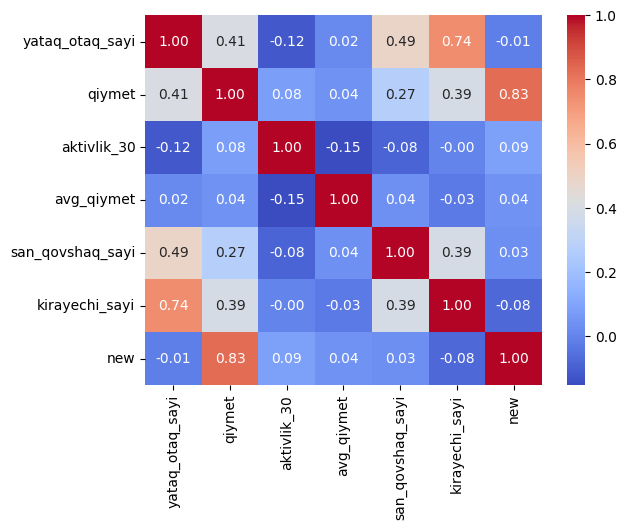

In [12]:
# Sual 5
corr  = df_clear.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot = True ,
            cmap = 'coolwarm' , fmt = '.2f')

Bilet 2

In [13]:
#Sual 1
#A
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data/main/homes2.csv')

<Axes: >

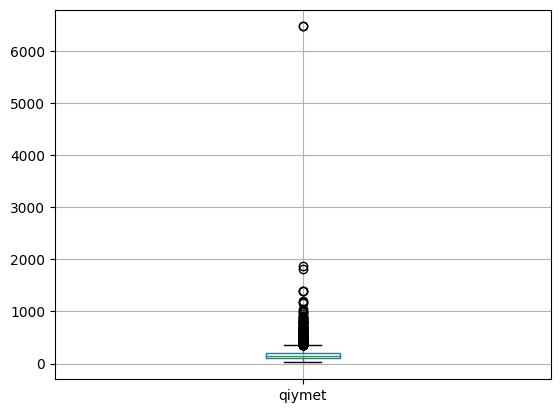

In [14]:
# B
df.boxplot(column = 'qiymet')

In [15]:
# C
import numpy as np
Q1 = np.percentile(df['qiymet'], 25, method='midpoint')
Q3 = np.percentile(df['qiymet'], 75, method='midpoint')
IQR = Q3 - Q1
low_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(low_bound)
print(upper_bound)

-50.0
350.0


In [16]:
# Sual2 a
df[(df['qiymet'] < low_bound) | (df['qiymet'] > upper_bound)]



,otaq_novu,kirayechi_sayi,yataq_otaq_sayi,qiymet,aktivlik_30
13,Private room,2,1,870,0
36,Entire home/apt,4,2,470,0
38,Entire home/apt,4,2,385,0
44,Entire home/apt,12,5,707,16
52,Entire home/apt,16,10,707,25
...,...,...,...,...,...
5201,Entire home/apt,4,2,469,30
5202,Entire home/apt,4,3,469,30
5223,Entire home/apt,6,6,480,30
5226,Entire home/apt,8,4,530,30


In [17]:
df_clear = df[(df['qiymet'] > low_bound) & (df['qiymet'] < upper_bound)]

In [18]:
#C
total = df_clear.isnull().sum().sort_values(ascending = False)
percent = (df_clear.isnull().sum() / df_clear.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
otaq_novu,0,0.0
kirayechi_sayi,0,0.0
yataq_otaq_sayi,0,0.0
qiymet,0,0.0
aktivlik_30,0,0.0


In [19]:
# A

df_clear['otaq_novu'].replace('Private room', 'shexsi otaq', inplace=True)


<ipython-input-19-6ca6f021aa93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['otaq_novu'].replace('Private room', 'shexsi otaq', inplace=True)


In [20]:
# b

df_clear.columns.str.replace('_', '.')
#c
df_clear.columns = df_clear.columns.str.replace('_', '.')

In [21]:
# sual 4
#a

df_clear['otaq_novu'] = df_clear['otaq.novu'] + '-' + df_clear['yataq.otaq.sayi'].astype(str)


<ipython-input-21-7fb9bcf72b3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['otaq_novu'] = df_clear['otaq.novu'] + '-' + df_clear['yataq.otaq.sayi'].astype(str)


In [22]:

# b
#c
df['qiymet$'] = '$' + df['qiymet'].astype(str)
df.head()

,otaq_novu,kirayechi_sayi,yataq_otaq_sayi,qiymet,aktivlik_30,qiymet$
0,Private room,2,1,60,15,$60
1,Private room,2,1,106,0,$106
2,Private room,2,1,135,8,$135
3,Private room,2,1,75,15,$75
4,Private room,1,1,128,12,$128


In [23]:
# sual 5
#a
df.select_dtypes(include=['int', 'float'])


,kirayechi_sayi,yataq_otaq_sayi,qiymet,aktivlik_30
0,2,1,60,15
1,2,1,106,0
2,2,1,135,8
3,2,1,75,15
4,1,1,128,12
...,...,...,...,...
5227,4,2,120,30
5228,4,2,140,13
5229,4,2,200,28
5230,4,2,116,19


In [24]:
#b
num_cols = df.select_dtypes(include=['int', 'float'])
num_cols.describe()

,kirayechi_sayi,yataq_otaq_sayi,qiymet,aktivlik_30
count,5232.000000,5232.000000,5232.000000,5232.000000
mean,2.990826,1.579702,172.216170,7.794534
std,1.479973,0.913038,171.535568,9.582113
min,1.000000,1.000000,20.000000,0.000000
25%,2.000000,1.000000,100.000000,0.000000
50%,2.000000,1.000000,143.000000,3.000000
75%,4.000000,2.000000,200.000000,15.000000
max,16.000000,10.000000,6477.000000,30.000000


Bilet 3

In [25]:
#Sual 1
#a
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data/main/advertising.csv')

In [26]:
# b

df_clear = df.dropna()


(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

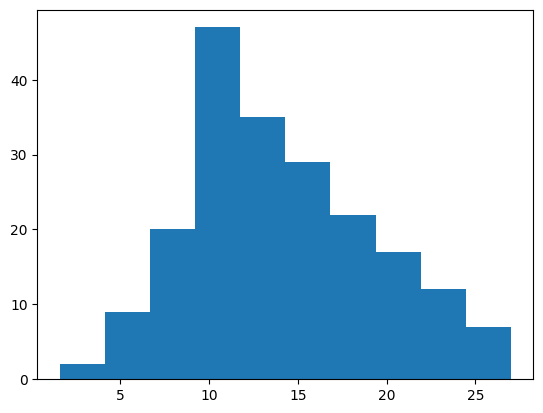

In [27]:
# sual2
#a
plt.hist(df['satishlar'])


In [28]:
# b
df_clear['satishlar'].describe()

count    196.000000
mean      14.046939
std        5.190222
min        1.600000
25%       10.475000
50%       12.900000
75%       17.400000
max       27.000000
Name: satishlar, dtype: float64

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
y = df_clear['satishlar']
X = df_clear.drop('satishlar' , axis = 1)

In [30]:
import statsmodels as sm
import statsmodels.regression.linear_model as sm
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              satishlar   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3572.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                   8.97e-169
Time:                        10:13:57   Log-Likelihood:                         -413.11
No. Observations:                 196   AIC:                                      832.2
Df Residuals:                     193   BIC:                                      842.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV_reklam        0.0535      0.001     40.219      0.000       0.051       0.056
radio_reklam     0.2235      0.009     23.816      0.000       0.205       0.242
Qezet_reklam     0.0171      0.007      2.560      0.011       0.004       0.030
==============================================================================
Omnibus:                        6.993   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                9.217
Skew:                          -0.229   Prob(JB):                      0.00997
Kurtosis:                       3.959   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#sual 4
#a
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, model.predict(X))
print(mse)
rmse = np.sqrt(mean_squared_error(y, model.predict(X)))
print(rmse)

3.9650594790276323
1.9912457103601333


In [32]:
# sual 5
#a
df_clear.iloc[:, [0,1,3]]

,TV_reklam,radio_reklam,satishlar
0,230.1,37.8,22.1
1,44.5,39.3,10.4
3,151.5,41.3,18.5
4,180.8,10.8,12.9
5,8.7,48.9,7.2
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [33]:
# sual 5
#b
df_clear['new_column'] = np.where(df_clear['satishlar'] > 20 , 'az' , 'chox')


<ipython-input-33-3f065c540d29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['new_column'] = np.where(df_clear['satishlar'] > 20 , 'az' , 'chox')


Bilet 4

In [34]:
#sual1
#a
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data/main/customers.csv')

In [35]:
#sual1 b
df2 = df.groupby('Region')['sud'].mean()

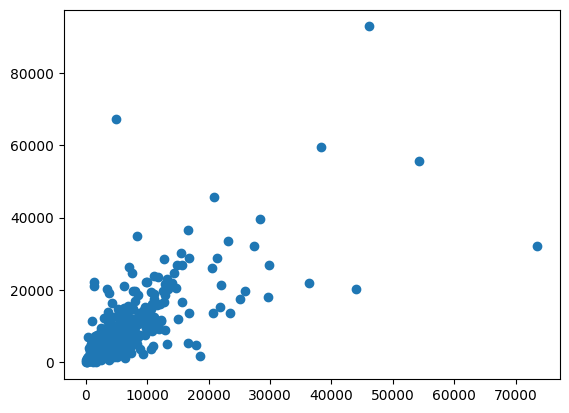

In [36]:
# sual 2 a

plt.scatter(df['sud'] , df['terevez'] )


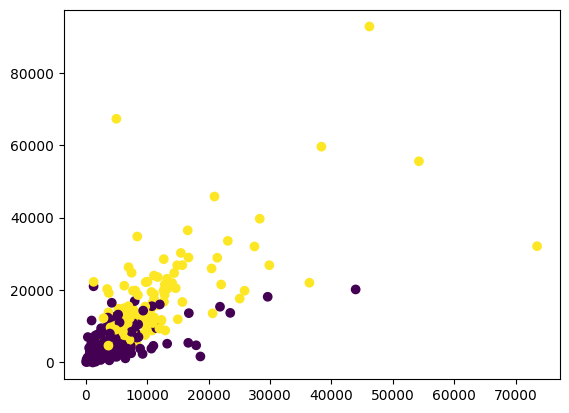

In [37]:
#sual 2 b
plt.scatter(df['sud'] , df['terevez'] , c = df['satish_kanali'])

In [38]:
df.sort_values(by = 'sud' , ascending = True)


,satish_kanali,Region,Fresh,sud,terevez,donmush
154,1,3,622,55,137,75
98,1,3,503,112,778,895
356,1,3,22686,134,218,3157
122,1,3,12212,201,245,1991
97,1,3,403,254,610,774
...,...,...,...,...,...,...
61,2,3,35942,38369,59598,3254
183,1,3,36847,43950,20170,36534
85,2,3,16117,46197,92780,1026
47,2,3,44466,54259,55571,7782


In [39]:
#B
df.loc[df['sud'] > 40000 , 'sud'] = 40000

In [40]:
df['terevez'] = df['terevez'] *1.05

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

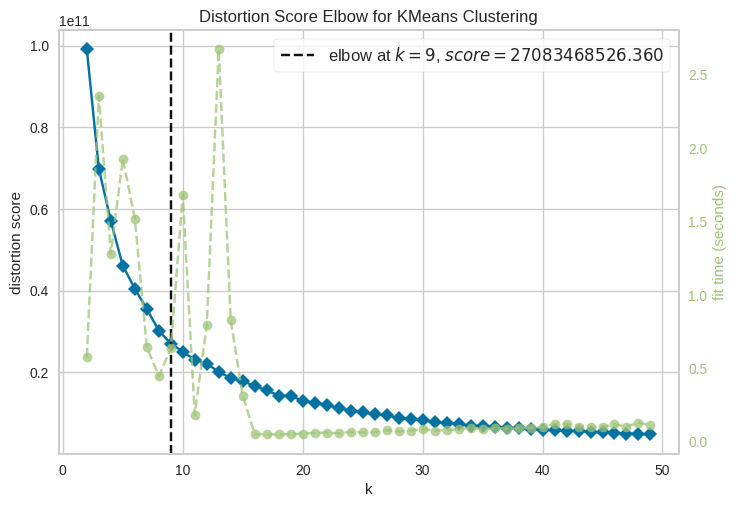

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
#sual 4
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df)
visualizer.poof()

In [42]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
klusterler = k_fit.labels_
klusterler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:

df["Klusterler"] = klusterler +1

In [44]:
#sual 5
df.describe()

,satish_kanali,Region,Fresh,sud,terevez,donmush,Klusterler
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5664.665909,8348.841136,3071.931818,2.015909
std,0.468052,0.774272,12647.328865,6502.879863,9978.320970,4854.673333,0.507099
min,1.000000,1.000000,3.000000,55.000000,3.150000,25.000000,1.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2260.650000,742.250000,2.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4993.275000,1526.000000,2.000000
75%,2.000000,3.000000,16933.750000,7190.250000,11188.537500,3554.250000,2.000000
max,2.000000,3.000000,112151.000000,40000.000000,97419.000000,60869.000000,3.000000


Bilet5

In [45]:
#saul 1 a
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data/main/banking.csv')
df.head()

,kreditmeblegi,Olke,cinsiyyet,yash,illik_maash,terk_etdi
0,619,France,Female,42,101348.88,1
1,608,Spain,Female,41,112542.58,0
2,502,France,Female,42,113931.57,1
3,699,France,Female,39,93826.63,0
4,850,Spain,Female,43,79084.10,0


In [46]:
# sual1 b
df.nunique()

kreditmeblegi     460
Olke                3
cinsiyyet           2
yash               70
illik_maash      9999
terk_etdi           2
dtype: int64

In [47]:

## saul 2 a
df.groupby('Olke')['kreditmeblegi'].agg('mean')

Olke
France     649.668329
Germany    651.453567
Spain      651.333872
Name: kreditmeblegi, dtype: float64

In [48]:
#b
np.sum(df['terk_etdi'])/10000

0.2037

In [49]:
# c
df.illik_maash.std()

57510.49281769816

In [50]:
# c
df.illik_maash.var()

3307456784.134512

In [51]:
df2 = df
dmy = df2[['Olke' , 'cinsiyyet']]
dmy = pd.get_dummies(dmy ,  drop_first = True)
cat_columns = df2.select_dtypes('object')
num_cols = df2.drop(cat_columns , axis = 1)
df2 = pd.concat([num_cols , dmy] , axis= 1)
df2.head()

,kreditmeblegi,yash,illik_maash,terk_etdi,Olke_Germany,Olke_Spain,cinsiyyet_Male
0,619,42,101348.88,1,0,0,0
1,608,41,112542.58,0,0,1,0
2,502,42,113931.57,1,0,0,0
3,699,39,93826.63,0,0,0,0
4,850,43,79084.10,0,0,1,0


<Axes: xlabel='cinsiyyet', ylabel='count'>

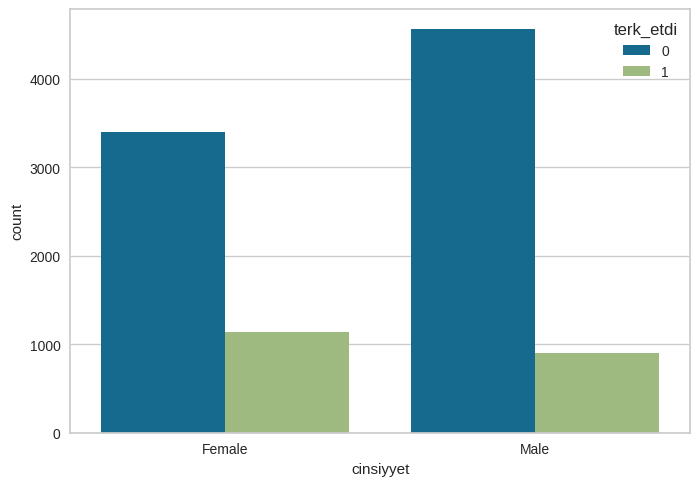

In [52]:
#sual 4
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='cinsiyyet', hue = 'terk_etdi',data = df)

In [53]:
#sual 5 a
y = df2["terk_etdi"]
X = df2.drop(["terk_etdi"], axis=1)


In [54]:
##sual 5 a
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
predictions = loj_model.predict(X)
predictions


array([0, 0, 0, ..., 0, 0, 0])

In [55]:
##Saul 5 B
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score
print(accuracy_score(y, predictions))
print(recall_score(y, predictions))

0.7878
0.045655375552282766
